In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados.head()

,Numero da Notificacao,Data da Notificacao,Sem Epid Notif,Data Primeiros Sintomas,Sem Epid Prim Sint,Cod Municipio Notificacao,Nome Municipio Notificacao,co_uni_not,Nome Unidade Notificacao,Vinculo SUS,...,v_lote_dose_REF_D4,v_lote_dose_UNICA,v_nome_dose_1,v_nome_dose_2,v_nome_dose_REF_D3,v_nome_dose_REF_D4,v_nome_dose_UNICA,Reinfeccao,Municipio_Mais_Populoso,Bandeira
0,3.165039e+13,2021-12-22,2021_51,2021-12-19,2021_51,260410.0,Caruaru,7498810.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto Alegre,NaN
1,3.162558e+11,2021-07-06,2021_27,2021-06-26,2021_25,410420.0,Campo Largo,13846.0,HOSPITAL E MATERNIDADE NOSSA SENHORA DO ROCIO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto Alegre,NaN
2,3.162065e+11,2021-05-01,2021_17,2021-04-29,2021_17,261160.0,Recife,147028.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto Alegre,NaN
3,3.161348e+11,2021-02-16,2021_07,2021-01-23,2021_03,431490.0,Porto Alegre,6295320.0,ASSOCIACAO EDUCADORA SAO CARLOS AESC,Estabelecimento COM vínculo SUS,...,NaN,NaN,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,COVID-19 PFIZER - COMIRNATY,NaN,NaN,NaN,Porto Alegre,NaN
4,3.162922e+11,2021-08-17,2021_33,2021-05-30,2021_22,431490.0,Porto Alegre,2237148.0,PREFEITURA MUNICIPAL DE PORTO ALEGRE,Estabelecimento COM vínculo SUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto Alegre,NaN


In [6]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [7]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [8]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

## Começo do filtro da tabela

In [9]:
filtro = dados[['Data Primeiros Sintomas','Classificacao final','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro

,Data Primeiros Sintomas,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021-12-19,Não Informado,NaN,NaN,NaN,NaN
1,2021-06-26,Não Informado,NaN,NaN,NaN,NaN
2,2021-04-29,Não Informado,NaN,NaN,NaN,NaN
3,2021-01-23,COVID-19,NaN,NaN,NaN,NaN
4,2021-05-30,COVID-19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184431,2021-02-15,COVID-19,Nao,NaN,NaN,NaN
184432,2021-09-10,COVID-19,NaN,NaN,NaN,NaN
184433,2021-03-18,COVID-19,NaN,NaN,NaN,NaN
184434,2020-07-15,SRAG não especificado,NaN,NaN,NaN,NaN


In [10]:
filtro['Data Primeiros Sintomas'] = pd.to_datetime(filtro['Data Primeiros Sintomas'],format='%d%m%Y')
filtro

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_14792\3105610356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['Data Primeiros Sintomas'] = pd.to_datetime(filtro['Data Primeiros Sintomas'],format='%d%m%Y')


,Data Primeiros Sintomas,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2021-12-19,Não Informado,NaN,NaN,NaN,NaN
1,2021-06-26,Não Informado,NaN,NaN,NaN,NaN
2,2021-04-29,Não Informado,NaN,NaN,NaN,NaN
3,2021-01-23,COVID-19,NaN,NaN,NaN,NaN
4,2021-05-30,COVID-19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184431,2021-02-15,COVID-19,Nao,NaN,NaN,NaN
184432,2021-09-10,COVID-19,NaN,NaN,NaN,NaN
184433,2021-03-18,COVID-19,NaN,NaN,NaN,NaN
184434,2020-07-15,SRAG não especificado,NaN,NaN,NaN,NaN


In [11]:
filtro = filtro.sort_values(by='Data Primeiros Sintomas')
filtro

,Data Primeiros Sintomas,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
36870,2019-12-29,SRAG não especificado,NaN,NaN,NaN,NaN
36893,2019-12-30,SRAG não especificado,NaN,NaN,NaN,NaN
32433,2019-12-30,SRAG não especificado,NaN,NaN,NaN,NaN
33644,2019-12-30,SRAG por influenza,Sim,Influenza B,NaN,NaN
56449,2019-12-31,SRAG não especificado,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
45539,2022-11-16,Não Informado,NaN,NaN,NaN,NaN
158369,2022-11-16,Não Informado,NaN,NaN,NaN,NaN
45540,2022-11-16,Não Informado,NaN,NaN,NaN,NaN
78148,2022-11-17,COVID-19,NaN,NaN,NaN,NaN


In [12]:
teste = filtro.groupby(['Data Primeiros Sintomas']).count()
teste['Contagem'] = teste['tp_flu_pcr'] + teste['pcr_vsr']
teste

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr,Contagem
Data Primeiros Sintomas,,,,,,
2019-12-29,1,0,0,0,0,0
2019-12-30,3,1,1,0,0,1
2019-12-31,3,0,0,0,0,0
2020-01-01,2,0,0,0,0,0
2020-01-02,4,0,0,0,0,0
...,...,...,...,...,...,...
2022-11-13,11,1,0,0,0,0
2022-11-14,9,1,0,0,0,0
2022-11-15,13,0,0,0,0,0


### Média Móvel

In [13]:
mediaMovel = teste.rolling(7).mean()
mediaMovel = mediaMovel['2020-03-02':]
mediaMovel

,Classificacao final,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr,Contagem
Data Primeiros Sintomas,,,,,,
2020-03-02,5.857143,0.142857,0.142857,0.142857,0.0,0.142857
2020-03-03,6.285714,0.142857,0.142857,0.142857,0.0,0.142857
2020-03-04,6.714286,0.285714,0.285714,0.285714,0.0,0.285714
2020-03-05,7.857143,0.142857,0.142857,0.142857,0.0,0.142857
2020-03-06,8.285714,0.142857,0.142857,0.142857,0.0,0.142857
...,...,...,...,...,...,...
2022-11-13,14.571429,1.142857,0.000000,0.000000,0.0,0.000000
2022-11-14,14.428571,1.142857,0.000000,0.000000,0.0,0.000000
2022-11-15,14.000000,0.857143,0.000000,0.000000,0.0,0.000000


In [14]:
dia = mediaMovel.reset_index()
dia = dia['Data Primeiros Sintomas']
dia

0     2020-03-02
1     2020-03-03
2     2020-03-04
3     2020-03-05
4     2020-03-06
         ...    
986   2022-11-13
987   2022-11-14
988   2022-11-15
989   2022-11-16
990   2022-11-17
Name: Data Primeiros Sintomas, Length: 991, dtype: datetime64[ns]

In [15]:
contagem = mediaMovel['Contagem']
contagem

Data Primeiros Sintomas
2020-03-02    0.142857
2020-03-03    0.142857
2020-03-04    0.285714
2020-03-05    0.142857
2020-03-06    0.142857
                ...   
2022-11-13    0.000000
2022-11-14    0.000000
2022-11-15    0.000000
2022-11-16    0.000000
2022-11-17    0.000000
Name: Contagem, Length: 991, dtype: float64

In [16]:
dia = dia.map(lambda x: str(x)[2:10])
dia

0      20-03-02
1      20-03-03
2      20-03-04
3      20-03-05
4      20-03-06
         ...   
986    22-11-13
987    22-11-14
988    22-11-15
989    22-11-16
990    22-11-17
Name: Data Primeiros Sintomas, Length: 991, dtype: object

In [17]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

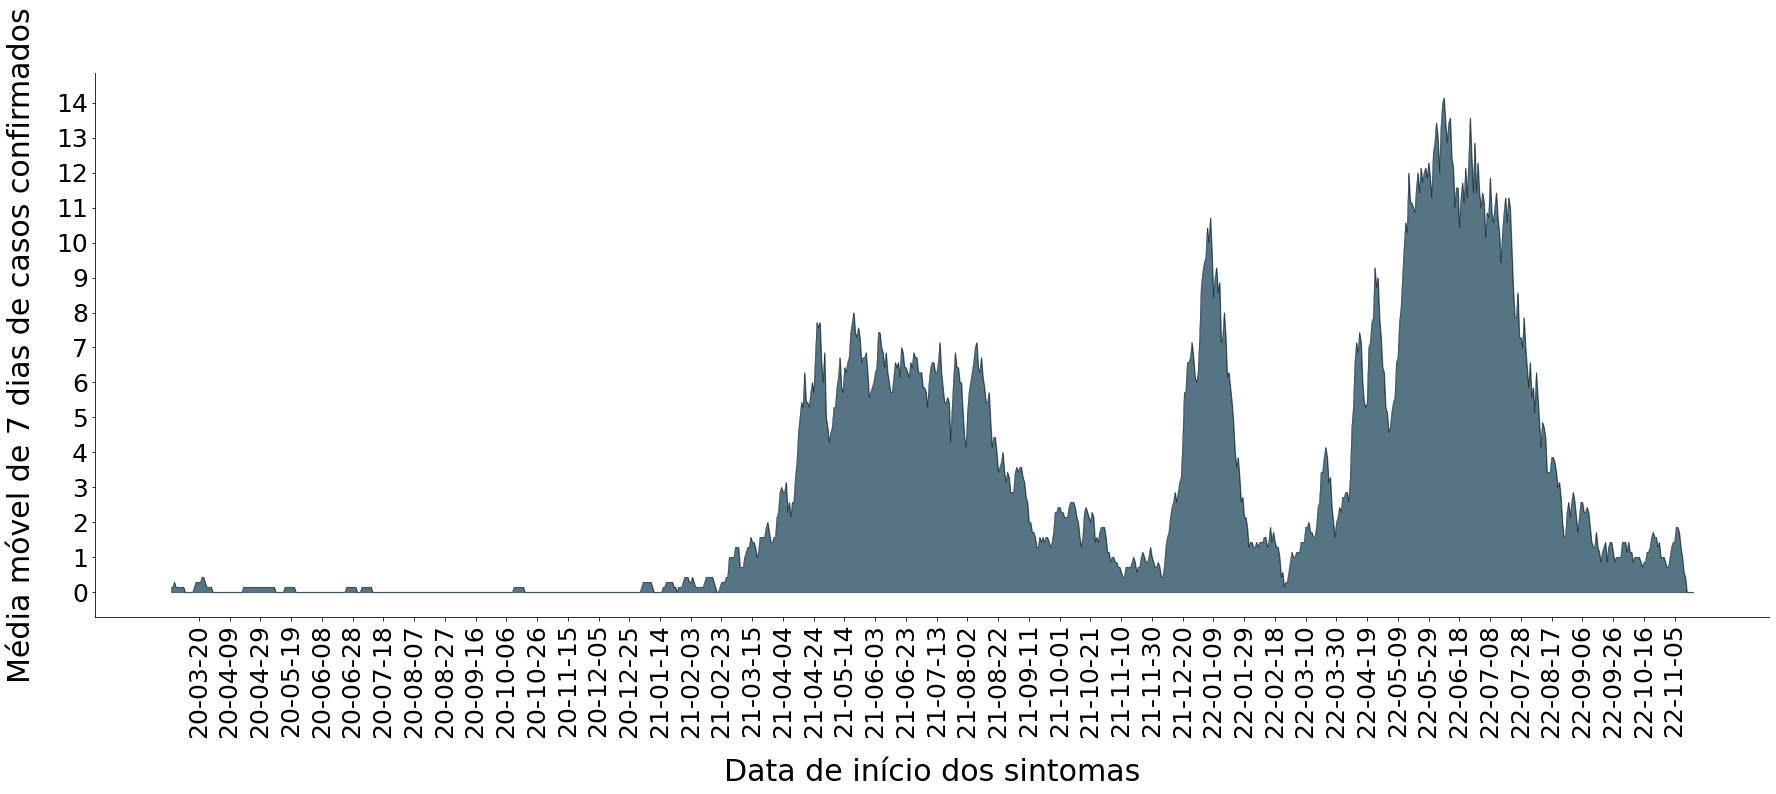

In [18]:
plt.figure(figsize=(30,10))
plt.plot(dia,contagem,color='#000000',linewidth=0.3)
plt.fill_between(dia,contagem,alpha=0.8,color='#2b5166')
plt.xticks(np.arange(18,np.size(dia),20),fontsize=25,rotation=90)
plt.xlabel("Data de início dos sintomas",labelpad=20,fontsize=30)
plt.yticks(np.arange(0,15,1),fontsize=25)
plt.ylabel('Média móvel de 7 dias de casos confirmados',labelpad=20,fontsize=30)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/mediaMovel_InfluVSR.png',dpi=720,bbox_inches='tight')

In [19]:
#virus = filtro.loc[]
#virus

In [20]:
#influenzaAH1 = filtro.loc[filtro['tp_flu_pcr']=='Influenza A']
#influenzaAH1 = influenzaAH1.loc[influenzaAH1['pcr_fluasu']=='Influenza A(H1N1)pdm09']
#influenzaAH1

In [21]:
#influenzaAH3 = filtro.loc[filtro['tp_flu_pcr']=='Influenza A']
#influenzaAH3 = influenzaAH3.loc[influenzaAH3['pcr_fluasu']=='Influenza A(H3N2)']
#influenzaAH3

In [22]:
#influenzaB = filtro.loc[filtro['tp_flu_pcr']=='Influenza B']
#influenzaB

In [23]:
#teste = dados[1925:]
#teste['pcr_fluasu']